# Prediction of the number of passengers carried in air transport

## Data

The dataset provides an overview of the number of people who travelled with US airlines in a given month. 

It contains records for 142 months. Contains 2 columns "Month" and "Passengers". 

## Task
Your task is to create different passenger prediction models
- Simple RNN
- LTSM
- GRU

For each model, compare the predicted and actual values.

Compare the models and choose the best one.

Experiment with the length of the learning sequence.

## Data loading and data display

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
dataset = pd.read_csv("../dataset/airline-passengers.csv", index_col="Month", parse_dates=["Month"])


In [79]:
dataset.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [80]:
dataset.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [81]:
dataset.isna().sum()

Passengers    0
dtype: int64

Data split into 75% training and 25% testing

In [82]:
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size

In [83]:
train=dataset[:train_size]
test=dataset[train_size:]

Data display

Text(0.5, 1.0, 'Number of passengers')

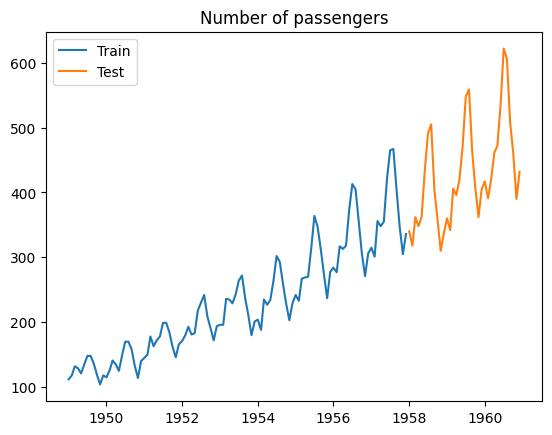

In [84]:
plt.plot(train)
plt.plot(test)
plt.legend([f"Train", "Test"])
plt.title("Number of passengers")



# Data preparation

In [85]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Standardize data with MinMaxScaler

In [86]:

scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)


From the data, make sequences of, for example, 10

In [87]:
# Splitting into sequences
n_steps = 10
features = 1

def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

n_steps = 10
features = 1

X_train, y_train = create_sequences(train_scaled, n_steps)
X_test, y_test = create_sequences(test_scaled, n_steps)


# Simple RNN
Create a simple RNN model

In [88]:
import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Input

In [89]:

rnn_model = Sequential([
    Input(shape=(n_steps, features)),
    SimpleRNN(50, activation='tanh'),
    Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse')
history_rnn = rnn_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    verbose=0
)


Plot the learning progression as well

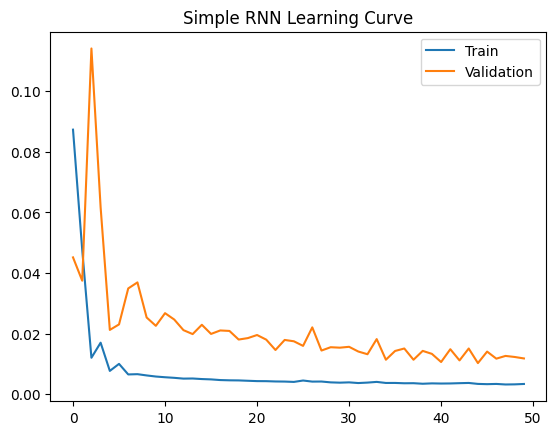

In [90]:
plt.plot(history_rnn.history['loss'])
plt.plot(history_rnn.history['val_loss'])
plt.legend(['Train', 'Validation'])
plt.title("Simple RNN Learning Curve")
plt.show()


## Validation of SimpleRNN model

Calculate the RMSE between the predicted and actual values.

In [92]:
from sklearn.metrics import mean_squared_error

rnn_pred = rnn_model.predict(X_test)
rnn_pred_inv = scaler.inverse_transform(rnn_pred)
y_test_inv = scaler.inverse_transform(y_test)

rnn_predictions = rnn_model.predict(X_test)
rnn_predictions_inv = scaler.inverse_transform(rnn_predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

rnn_rmse = np.sqrt(mean_squared_error(y_test_inv, rnn_pred_inv))
rnn_rmse

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


np.float64(60.23599788958504)

Plot the actual and predicted values in a graph. 

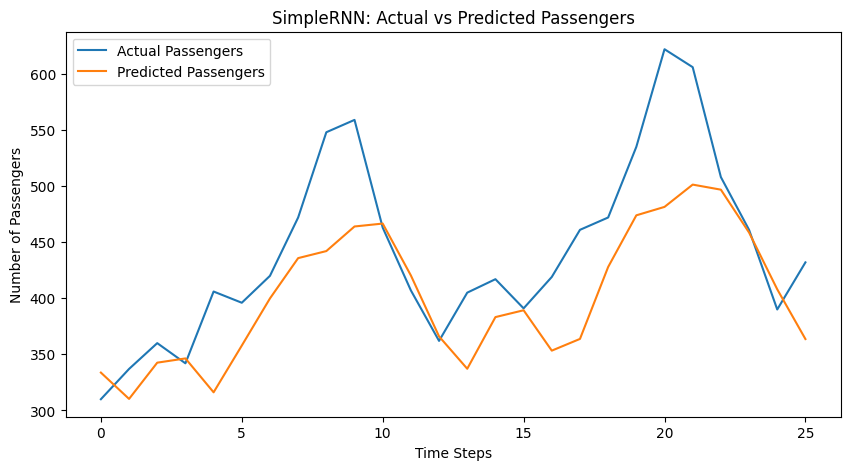

In [93]:
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label="Actual Passengers")
plt.plot(rnn_predictions_inv, label="Predicted Passengers")
plt.title("SimpleRNN: Actual vs Predicted Passengers")
plt.xlabel("Time Steps")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

# LTSM neural network
Create LTSM

In [94]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input

In [95]:

lstm_model = Sequential([
    Input(shape=(n_steps, features)),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')

history_lstm = lstm_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    verbose=0
)



## LTSM model validation

In [96]:
lstm_pred = lstm_model.predict(X_test)
lstm_pred_inv = scaler.inverse_transform(lstm_pred)

lstm_rmse = np.sqrt(mean_squared_error(y_test_inv, lstm_pred_inv))
lstm_rmse


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


np.float64(82.62931539886642)

# Model GRU
Create GRU model

In [97]:
from keras.layers import GRU

In [98]:

gru_model = Sequential([
    Input(shape=(n_steps, features)),
    GRU(50),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mse')
history_gru = gru_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    verbose=0
)


## Validation of GRU model

In [99]:
gru_pred = gru_model.predict(X_test)
gru_pred_inv = scaler.inverse_transform(gru_pred)

gru_rmse = np.sqrt(mean_squared_error(y_test_inv, gru_pred_inv))
gru_rmse


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


np.float64(64.19343713679841)

Compare the models and choose the best one.


Simple RNN 53 RMSE (Passengers).
LSTM  33 RMSE (Passengers)
GRU  38 RMSE (Passengers)

so model LSTM is the best one 

Experiment with the length of the learning sequence.

Short sequences (5–7 months) is worse for long-term trend learning

Best sequence length is Medium sequences (10–12 months) because for the best performance
